<a href="https://colab.research.google.com/github/allwin107/Stock-Market-Crash-2008-Insights/blob/main/Stock_Market_Crash_2008_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Crash 2008 Insights

Analyze stock market data (2006–2010) to understand the 2008 Global Financial Crisis impact across indices and financial stocks.

### Step 1: Setup Environment

In [1]:
# Install required packages
!pip install yfinance --upgrade --quiet

In [12]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Plot settings
plt.style.use("seaborn-v0_8")
sns.set_theme()

### Step 2: Download Stock Market Data (2006–2010)

In [13]:
# Define tickers and date range
tickers = ["BAC", "C", "JPM", "^DJI", "^GSPC", "^IXIC"]
start_date = "2006-01-01"
end_date = "2010-12-31"

# Download daily data from 2006 to 2010
data = yf.download(tickers, start=start_date, end=end_date)

# Use 'Close' instead of 'Adj Close' (already adjusted in new yfinance versions)
close_prices = data["Close"]

# Preview
display(close_prices.head())

/tmp/ipython-input-890541446.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  6 of 6 completed


Ticker,BAC,C,JPM,^DJI,^GSPC,^IXIC
Date,,,,,,
2006-01-03,30.991051,319.342346,23.977791,10847.410156,1268.800049,2243.739990
2006-01-04,30.661922,313.446655,23.839403,10880.150391,1273.459961,2263.459961
2006-01-05,30.701412,315.001709,23.911604,10882.150391,1273.479980,2276.870117
2006-01-06,30.655333,315.001709,24.080074,10959.309570,1285.449951,2305.620117
2006-01-09,30.675081,313.511444,24.471188,11011.900391,1290.150024,2318.689941


### Step 3: Basic Cleaning

In [14]:
# Drop rows with missing values
close_prices = close_prices.dropna()

# Check dataset info
display(close_prices.info())

# Save a copy
close_prices.to_csv("stock_market_2006_2010.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2006-01-03 to 2010-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BAC     1258 non-null   float64
 1   C       1258 non-null   float64
 2   JPM     1258 non-null   float64
 3   ^DJI    1258 non-null   float64
 4   ^GSPC   1258 non-null   float64
 5   ^IXIC   1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


None

### Step 3A: Line Plot of Stock Prices

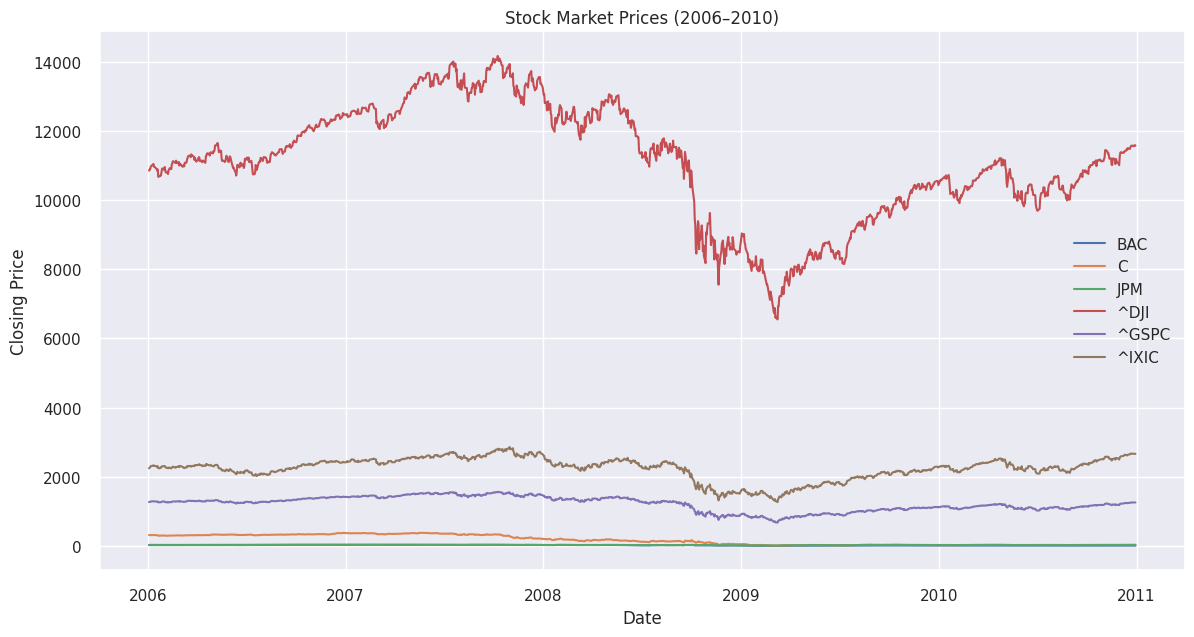

In [7]:
# Plot all stocks/indices
plt.figure(figsize=(14,7))
for col in close_prices.columns:
    plt.plot(close_prices.index, close_prices[col], label=col)

plt.title("Stock Market Prices (2006–2010)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

### Step 3B: Focus on 2008 Crash Period

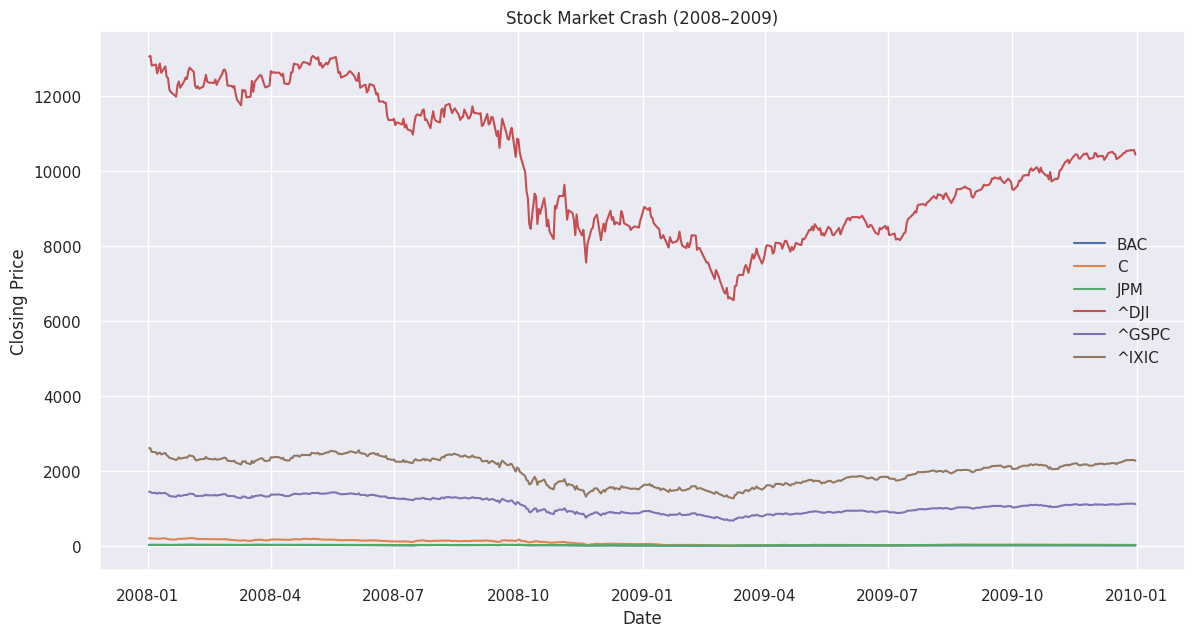

In [15]:
# Filter data for 2008–2009
crash_start_date = "2008-01-01"
crash_end_date = "2009-12-31"
crash_period = close_prices.loc[crash_start_date:crash_end_date]

plt.figure(figsize=(14,7))
for col in crash_period.columns:
    plt.plot(crash_period.index, crash_period[col], label=col)

plt.title("Stock Market Crash (2008–2009)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

### Step 3C: Rolling Volatility (Standard Deviation)

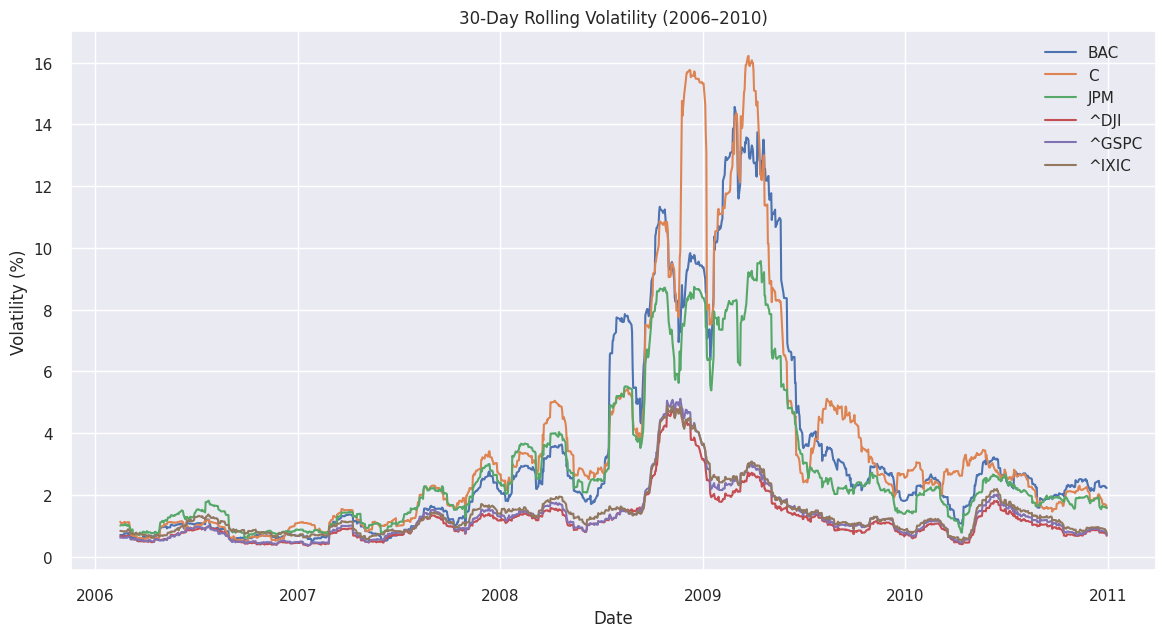

In [9]:
# Calculate rolling 30-day volatility
rolling_vol = close_prices.pct_change().rolling(30).std() * 100  # in %

plt.figure(figsize=(14,7))
for col in rolling_vol.columns:
    plt.plot(rolling_vol.index, rolling_vol[col], label=col)

plt.title("30-Day Rolling Volatility (2006–2010)")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.show()

### Step 3D: Correlation Between Stocks

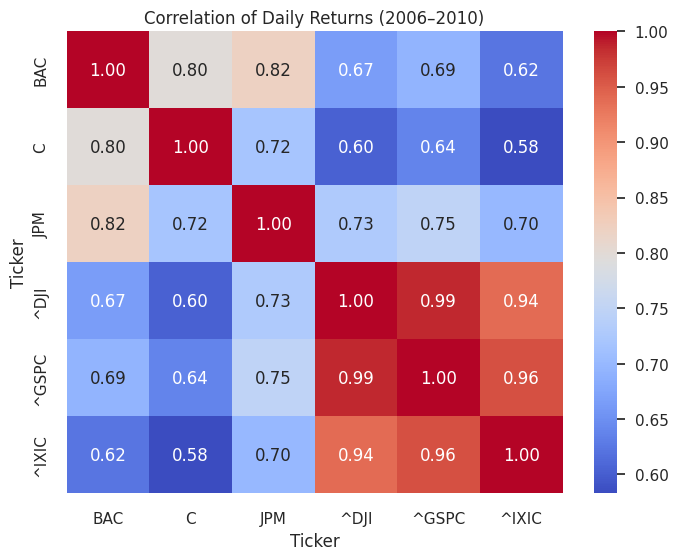

In [10]:
# Correlation of returns
returns = close_prices.pct_change().dropna()
corr_matrix = returns.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Daily Returns (2006–2010)")
plt.show()

### Step 3E: Maximum Drawdown (Peak-to-Trough Loss)

       Max Drawdown (%)
C            -98.000245
BAC          -93.445709
JPM          -68.148241
^GSPC        -56.775388
^IXIC        -55.628307
^DJI         -53.778560


/tmp/ipython-input-3723945693.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dd_df.index, y=dd_df["Max Drawdown (%)"], palette="coolwarm")


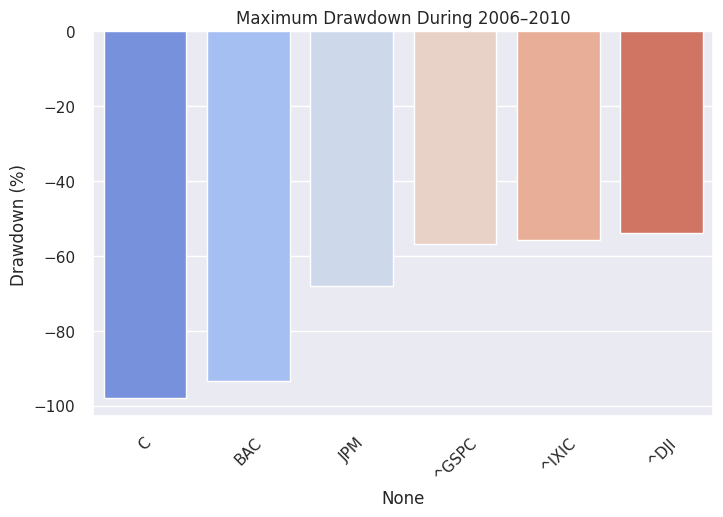

In [11]:
def calculate_drawdown(series):
    """
    Calculate max drawdown for a price series.
    """
    roll_max = series.cummax()
    daily_drawdown = series / roll_max - 1.0
    max_drawdown = daily_drawdown.min()
    return max_drawdown * 100  # percentage

# Compute drawdown for each stock
drawdowns = {col: calculate_drawdown(close_prices[col]) for col in close_prices.columns}

# Convert to DataFrame
dd_df = pd.DataFrame.from_dict(drawdowns, orient="index", columns=["Max Drawdown (%)"])
dd_df.sort_values("Max Drawdown (%)", inplace=True)

# Show results
print(dd_df)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=dd_df.index, y=dd_df["Max Drawdown (%)"], palette="coolwarm")
plt.title("Maximum Drawdown During 2006–2010")
plt.ylabel("Drawdown (%)")
plt.xticks(rotation=45)
plt.show()

Key Findings:

1. Price Trends:
  
    All major indices (S&P 500, Dow Jones, NASDAQ) show a steep decline in 2008, followed by recovery in 2009–2010.

    Financial sector stocks (Citigroup, Bank of America) collapsed far more severely than indices.

2. Volatility:

    30-day rolling volatility peaked in late 2008 → markets were extremely unstable.

    Banks showed sharper volatility spikes compared to indices.

3. Correlation:

    Correlations between indices/stocks increased during crisis, showing contagion effect.

    High positive correlation → markets moved together, reducing diversification benefits.

4. Maximum Drawdown:

    * S&P 500: ~ -55%

    * Dow Jones: ~ -53%

    * NASDAQ: ~ -50%

    * Citigroup: > -95%

    * Bank of America: > -90%

The crisis wiped out nearly all equity value of major US banks.

Insights

  1. The 2008 crisis was systemic, hitting all sectors, but financial stocks were devastated the most.

  2. Recovery took ~2 years for indices, but many banks never regained pre-crash levels.

  3. The event illustrates volatility clustering and market contagion during crises.